In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

import tensorflow as tf

In [217]:
data = pd.read_csv('/kaggle/input/avocado-prices/avocado.csv')

In [218]:
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [219]:
data['Unnamed: 0'].max()

52

In [220]:
len(data['Date'].unique())

169

In [221]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [222]:
data.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [223]:
def get_unique(data,column):
    return {columns : len(data[columns].unique()) for columns in column}

In [224]:
categorical_columns = ['Date',]

In [225]:
get_unique(data,categorical_columns)

{'Date': 169}

In [226]:
ordinal_sort = sorted(data['Date'].unique())

In [227]:
def ordinal_encoder(data,columns,ordined) :
    data[columns] = data[columns].apply(lambda x : ordined.index(x))
    return data

In [228]:
ordinal_encoder(data,'Date',ordinal_sort)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,160,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,159,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,158,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [229]:
def dummie(data,columns=['region']):
    for col in columns :
        dummie = pd.get_dummies(data[col])
        dummie = dummie.astype(np.float)
        data = pd.concat([data,dummie],axis=1)
        data.drop(col,axis=1,inplace=True)
    return data    
    

In [230]:
data = dummie(data)

/tmp/ipykernel_32/2083704062.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dummie = dummie.astype(np.float)


In [231]:
encoder = LabelEncoder()
data['type'] = encoder.fit_transform(data['type'])

In [232]:
y = data['type']
x = data.drop('type',axis=1)



In [233]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x) , columns=x.columns)

In [234]:
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.80)

In [235]:
x

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,-0.676360,-0.188689,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558,...,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.136750
1,-0.696857,-0.139020,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,...,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.136750
2,-0.717355,-1.182069,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558,...,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.136750
3,-0.737853,-0.809551,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558,...,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.136750
4,-0.758350,-0.312861,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558,...,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.136750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.578371,0.556347,-0.241373,-0.230017,-0.243857,-0.212540,-0.229301,-0.226665,-0.220964,-0.17558,...,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,7.312635
18245,1.557874,0.755023,-0.242296,-0.230693,-0.242277,-0.212540,-0.233594,-0.232196,-0.221403,-0.17558,...,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,7.312635
18246,1.537376,1.152375,-0.242331,-0.230693,-0.243090,-0.205766,-0.233463,-0.231644,-0.222561,-0.17558,...,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,7.312635
18247,1.516879,1.301382,-0.241625,-0.230428,-0.242651,-0.205774,-0.231866,-0.229543,-0.222529,-0.17558,...,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,-0.137372,7.312635


In [255]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(65))
model.add(tf.keras.layers.Dense(65,activation='relu'))
model.add(tf.keras.layers.Dense(65,activation='relu'))
model.add(tf.keras.layers.Dense(65,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='mae',metrics=['accuracy'])

epochs = 9

hist = model.fit(x_train , y_train , validation_split=0.2,batch_size=65,epochs=epochs,callbacks=tf.keras.callbacks.ReduceLROnPlateau(verbose=1),verbose=0)

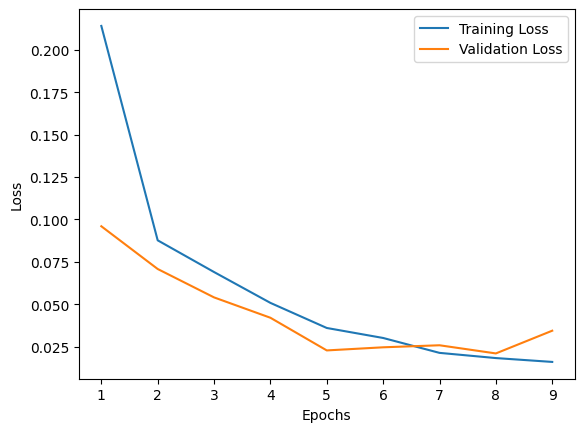

In [256]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.plot(range(1,epochs +1 ),train_loss,label='Training Loss')
plt.plot(range(1,epochs +1),val_loss,label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.show()

In [257]:
model.evaluate(x_test,y_test)

115/115 [==============================] - 0s 1ms/step - loss: 0.0287 - accuracy: 0.9734


[0.028712144121527672, 0.9734246730804443]

In [258]:
y_pred = model.predict(x_test)

115/115 [==============================] - 0s 1ms/step


In [259]:
np.argmin(val_loss)

7

In [260]:
y_test.mean()

0.5101369863013698

In [261]:
y_pred.mean()

0.51304907

In [262]:
y_test.sum()/y_pred.sum()

0.9943240074998483